The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress

# Importing the dataset

In [3]:
movies= pd.read_csv("fandango_score_comparison.csv")

In [4]:
movies.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


Each row represents a single movie. Each column contains information about how the online moview review services [RottenTomatoes](https://rottentomatoes.com/), [Metacritic](http://www.metacritic.com/), [IMDB](https://www.imdb.com/), and [Fandango](https://www.fandango.com/) rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

- RottenTomatoes - 0-100, in increments of 1.
- Metacritic - 0-100, in increments of 1.
- IMDB - 0-10, in increments of .1.
- Fandango - 0-5, in increments of .5.

# Exploratory Data Analysis - Fandango Vs Metacritic

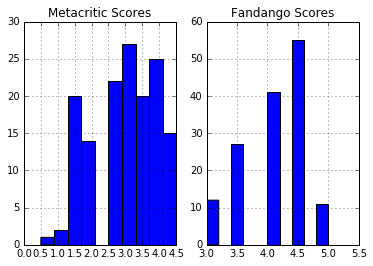

In [5]:
fig= plt.figure()

ax1= fig.add_subplot(121)
movies["Metacritic_norm_round"].hist(ax=ax1)
ax1.set_title("Metacritic Scores")

ax2= fig.add_subplot(122)
movies["Fandango_Stars"].hist(ax=ax2)
ax2.set_title("Fandango Scores")


**Comments**:
- Fandango's scores range from 3-5. The mean score for this website looks like it is between 4 and 4.5.
- Metacritic scores are more varied and not skewed like Fandango's. Mean score for this one would be 3-3.5

In [6]:
print("Mean Fandango Scores: ", movies["Fandango_Stars"].mean())
print("Mean Metacritic Scores: ", movies["Metacritic_norm_round"].mean())

Mean Fandango Scores:  4.08904109589
Mean Metacritic Scores:  2.97260273973


In [7]:
print("Median Fandango Scores: ", movies["Fandango_Stars"].median())
print("Median Metacritic Scores: ", movies["Metacritic_norm_round"].median())

Median Fandango Scores:  4.0
Median Metacritic Scores:  3.0


In [8]:
print("Stdev Fandango Scores: ", np.std(movies["Fandango_Stars"]))
print("Stdev Metacritic Scores: ", np.std(movies["Metacritic_norm_round"]))

Stdev Fandango Scores:  0.53853216127
Stdev Metacritic Scores:  0.987561029704


**Fandango VS Metacritic Methodology**  
Fandango appears to inflate ratings and isn't transparent about how it calculates and aggregates ratings. Metacritic publishes each individual critic rating, and is transparent about how they aggregate them to get a final rating.

**Fandango VS Metacritic Differences**  
- The mean Fandango is high obviously because all the scores lie in the range of 3-5 which is higher than Meteacrtic in totality. 
- The median is higher for Fandango because of the same reason, although the difference between their median scores is not as much as the mean. That is because of the concentration of higher scores for Meteacritic.
- As can be seen in the histograms above, the graph for Fandango is much more concentrated between 3 and 5 as opposed to the Metacritic scores which are more spread out. The reason could probably be how the difference in methodology for botht the websites.


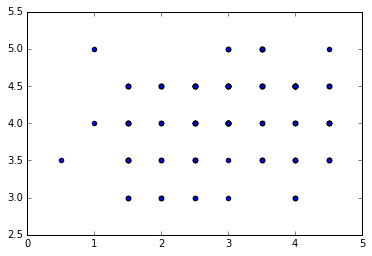

In [9]:
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

In [10]:
movies["fm_diff"] = np.abs(movies["Metacritic_norm_round"] - movies["Fandango_Stars"])

In [11]:
movies.sort_values(by="fm_diff", ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


In [12]:
r_value, p_value = pearsonr(movies["Fandango_Stars"], movies["Metacritic_norm_round"])

r_value

0.17844919073895918

**Fandango and Meteacritic Correlation**  
The correlation between the two is pretty low. This tells us that the Fandango scores aren't just inflated, they are fundamentally different. For whatever reason, it appears like Fandango both inflates scores overall, and inflates scores differently depending on the movie.

** Linear Regression**

In [13]:

slope, intercept, r_value, p_value, stderr_slope = linregress(movies["Metacritic_norm_round"], movies["Fandango_Stars"])

pred = 3 * slope + intercept

pred

4.0917071528212041

In [14]:
r_value

0.17844919073895882

This r_value shows a poor coorelation between the two website's scores.

# Finding Residuals

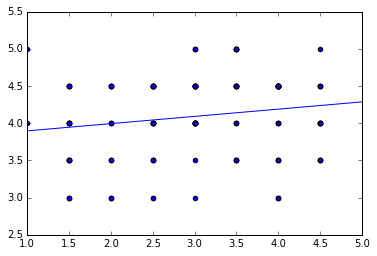

In [15]:
pred_1 = 1 * slope + intercept
pred_5 = 5 * slope + intercept
plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1,5],[pred_1,pred_5])
plt.xlim(1,5)
plt.show()


The r_value and thie above plot suggest 

## Next Potential Steps:
- Explore the other rating services, IMDB and RottenTomatoes.
- See how they differ from each other.
- See how they differ from Fandango.
- See how user scores differ from critic scores.
- Acquire more recent review data, and see if the pattern of Fandango inflating reviews persists.
- Dig more into why certain movies had their scores inflated more than others.